['SFHF', 'FFFF', 'FFFF', 'FHFG']
Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.17696325 0.37210168 0.17614797 0.17796791]
 [0.40047253 0.14894518 0.09207371 0.16210941]
 [0.         0.         0.         0.        ]
 [0.17695259 0.11262054 0.32747395 0.24350017]
 [0.19559472 0.19181954 0.38074238 0.19152622]
 [0.20648057 0.39325469 0.2038652  0.20637989]
 [0.11318197 0.60456882 0.20054365 0.17874991]
 [0.34110558 0.71642811 0.34164021 0.33545356]
 [0.19946338 0.18379689 0.18859838 0.39539253]
 [0.17059171 0.1705217  0.10385712 0.53752544]
 [0.34762187 0.35480045 0.72194388 0.36247031]
 [0.40292238 0.94498703 0.4042277  0.40436408]
 [0.17831999 0.08513016 0.07762274 0.09201649]
 [0.         0.         0.         0.        ]
 [0.3083258  0.369

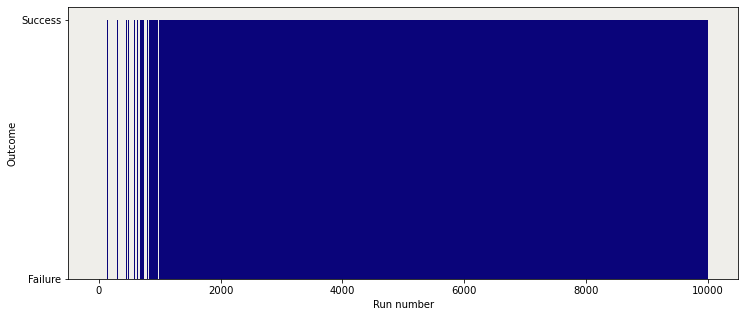

100.0
Success rate = 100.0%


In [130]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from gym.envs.toy_text.frozen_lake import generate_random_map

random_map=['SFHF', 'FFFF', 'FFFF', 'FHFG']
#random_map=['SFFFHFFFFFFFFFF', 'FFFFFFFHFFFHFFF', 'FFFHFHFFFFFFFFF', 'FFFFFFFFFFFFFHF', 'FFFFFHHFFHFFFFF', 'FFFFFFFFFFFFFFF', 'FFFFFFHFFHFFHFF', 'FFFFFFFFFFHHFFF', 'FFFFFFFFFFFFFFF', 'FFFFFFFFFFFFFFF', 'FFFFFFFHFFFFFFH', 'FFHFFFFFFFFHFHF', 'FFFFHFFFFFFFHFF', 'FFFHFFFFFFFFFFF', 'FFFFFFHFFHFFFFG']
#random_map = generate_random_map(size=8, p=0.9)
print(random_map)
environment = gym.make('FrozenLake-v1', desc=random_map, is_slippery=True, render_mode="rgb_array")
environment.reset()

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 10000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.95            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = environment.step(action)[0:4]

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

#print(outcomes)
# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = environment.step(action)[0:4]

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

print(nb_success)
# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

In [128]:
policy_list=[]
size_frozen_lake=4
for i in range (size_frozen_lake*size_frozen_lake):
    current_max=np.max(qtable[i,:])
    for j in range (size):
        if current_max==0:
            policy_list.append(0)
        if current_max!=0:
            if qtable[i,j]==current_max:
                policy_list.append((i,j))
print(policy_list)

[(0, 1), (1, 0), 0, 0, 0, 0, (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 3), (9, 3), (10, 2), (11, 1), (12, 0), 0, 0, 0, 0, (14, 2), 0, 0, 0, 0]


In [123]:
policy_95=(1,0,0,2,1,1,1,1,3,3,2,1,0,0,2,0)
policy_90=(2,0,0,2,1,1,1,1,3,3,2,1,0,0,2,0)
policy_85=(1,0,0,2,1,2,1,1,3,3,2,1,0,0,2,0)
policy_80=(2,0,0,2,3,2,1,1,3,2,2,1,0,0,2,0)
policy=policy_95
print(policy)
print(random_map)

(1, 0, 0, 2, 1, 1, 1, 1, 3, 3, 2, 1, 0, 0, 2, 0)
['SFHF', 'FFFF', 'FFFF', 'FHFG']


In [125]:
policy_reshape=np.reshape(policy,(size_frozen_lake,size_frozen_lake))
print(policy_reshape)

[[1 0 0 2]
 [1 1 1 1]
 [3 3 2 1]
 [0 0 2 0]]


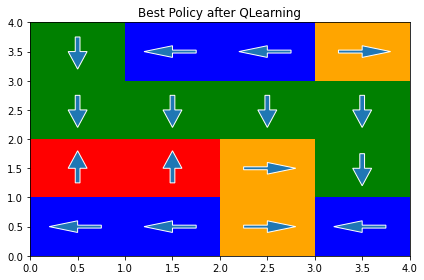

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111, xlim=(0, policy_reshape.shape[1]), ylim=(0, policy_reshape.shape[0]))
color_map=['blue','green','orange','red']

for i in range(policy_reshape.shape[0]):
    for j in range(policy_reshape.shape[1]):
        state_corner_1=policy_reshape.shape[0]-i-1
        state_corner_2=j
        state_rectangle = plt.Rectangle([state_corner_2, state_corner_1], 1, 1)
        state_rectangle.set_facecolor(color_map[policy_reshape[i,j]])
        ax.add_patch(state_rectangle)
        
        if policy_reshape[i,j]==0:
            plt.arrow(state_corner_2+0.75, state_corner_1+0.5, -0.25, 0,head_width = 0.2,width = 0.05,ec ='white')
        if policy_reshape[i,j]==1:
            plt.arrow(state_corner_2+0.5, state_corner_1+0.75, 0, -0.25,head_width = 0.2,width = 0.05,ec ='white')
        if policy_reshape[i,j]==2:
            plt.arrow(state_corner_2+0.25, state_corner_1+0.5, 0.25, 0,head_width = 0.2,width = 0.05,ec ='white')
        if policy_reshape[i,j]==3:
            plt.arrow(state_corner_2+0.5, state_corner_1+0.25, 0, 0.25,head_width = 0.2,width = 0.05,ec ='white')
        
plt.axis('on')
plt.title('Best Policy after QLearning')
plt.xlim((0, policy_reshape.shape[1]))
plt.ylim((0, policy_reshape.shape[0]))
plt.tight_layout()
#plt.savefig(title+str('.png'))
plt.show()